# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
pd.options.display.max_columns = 100 # make sure up to 100 columns are viewable by scrolling
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [3]:
# number of callbacks for black-sounding names
sum(data[data.race=='b'].call)

157.0

In [4]:
# number of callbacks for white-sounding names
sum(data[data.race=='w'].call)

235.0

In [5]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,occupbroad,workinschool,email,computerskills,specialskills,firstname,sex,race,h,l,call,city,kind,adid,fracblack,fracwhite,lmedhhinc,fracdropout,fraccolp,linc,col,expminreq,schoolreq,eoe,parent_sales,parent_emp,branch_sales,branch_emp,fed,fracblack_empzip,fracwhite_empzip,lmedhhinc_empzip,fracdropout_empzip,fraccolp_empzip,linc_empzip,manager,supervisor,secretary,offsupport,salesrep,retailsales,req,expreq,comreq,educreq,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,1,0,0,1,0,Allison,f,w,0.0,1.0,0.0,c,a,384.0,0.989360,0.005500,9.527484,0.274151,0.037662,8.706325,1.0,5,,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,6,1,1,1,0,Kristen,f,w,1.0,0.0,0.0,c,a,384.0,0.080736,0.888374,10.408828,0.233687,0.087285,9.532859,0.0,5,,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,1,1,0,1,0,Lakisha,f,b,0.0,1.0,0.0,c,a,384.0,0.104301,0.837370,10.466754,0.101335,0.591695,10.540329,1.0,5,,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,5,0,1,1,1,Latonya,f,b,1.0,0.0,0.0,c,a,384.0,0.336165,0.637370,10.431908,0.108848,0.406576,10.412141,0.0,5,,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,5,1,1,1,0,Carrie,f,w,1.0,0.0,0.0,c,a,385.0,0.397595,0.180196,9.876219,0.312873,0.030847,8.728264,0.0,some,,1.0,9.4,143.0,9.4,143.0,0.0,0.204764,0.727046,10.619399,0.070493,0.369903,10.007352,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [6]:
data.shape

(4870, 65)

There are 4870 rows in the table.


call,0.0,1.0
race,,
b,2278,157
w,2200,235


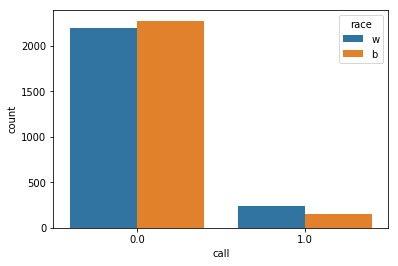

In [7]:
# visualize data: compare callbacks between white- and black- sounding names
# remove unnecessary columns
data1 = data[['race', 'call']]
data1.head()

print("There are", len(data1), "rows in the table.")

sns.countplot(x=data1.call, hue=data1.race)

data.groupby(['race','call']).size().unstack()

_Upon a quick glance, resumes with white-sounding names are receiving more calls than those with black-sounding names._

#### Q1. What test is appropriate for this problem? Does CLT apply?
- Two sample z-test. Comparing two population means / large sample size (n > 30).
- CLT applies since the sample size is large and the observations are independent.

#### Q2. What are the null and alternate hypothesis?
- Null: Thre is no difference in the proportion of callbacks between resumes with black-sounding names and those with white-sounding names. 
- Alternate: Thre is a difference in the proportion of callbacks between resumes with black-sounding names and those with white-sounding names.

In [8]:
# compute distribution of 'race' column
w = data[data.race=='w']
print(np.shape(w))
b = data[data.race=='b']
print(np.shape(b))

(2435, 65)
(2435, 65)


In [9]:
# compute the callback rate per race
data.groupby(['race','call']).size().apply(lambda x: x/2435).unstack()

call,0.0,1.0
race,,
b,0.935524,0.064476
w,0.903491,0.096509


#### Q3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.


##### Pre-calculations

In [52]:
# calculate the number of callbacks for each race
call_b = sum(data[data.race == 'b'].call)
call_w = sum(data[data.race == 'w'].call)

# calculate the total number of rows for each race
rows_b = len(data[data.race == 'b'].call)
rows_w = len(data[data.race == 'w'].call)

# calculate the proportion of callbacks for each race
prop_b = call_b / rows_b
prop_w = call_w / rows_w

print('The callback rate for black-sounding names is ', round(prop_b, 3))
print('The callback rate for white-sounding names is ', round(prop_w, 3))

The callback rate for black-sounding names is  0.064
The callback rate for white-sounding names is  0.097


#### Compute margin of error and confidence interval

In [65]:
# calculate standard error for the two distributions
stderr = np.sqrt((prop_b*(1-prop_b)/rows_b) + (prop_w*(1-prop_w)/rows_w))
stderr

0.0077833705866767544

In [70]:
# calculate margin of error (z* = 1.96)
critical_value = 1.96
margin_of_error = abs(critical_value * stderr)
print("The true population proportion lies +/- %0.5F around the point estimate" % margin_of_error)

The true population proportion lies +/- 0.01526 around the point estimate


In [84]:
# compute 95% confidence interval
obs_diff = prop_w - prop_b
conf_int = [obs_diff - margin_of_error, obs_diff + margin_of_error]
print(conf_int)

print("The proportion is %0.5F +/- %0.5F." % (obs_diff, margin_of_error))
print("The proportion of resumes with white-sounding names that receive a call is between %0.5F and %0.5F higher than the proportion of resumes with black-sounding names." % (conf_int[0], conf_int[1]))

[0.016777447859559147, 0.047288260559332024]
The proportion is 0.03203 +/- 0.01526.
The proportion of resumes with white-sounding names that receive a call is between 0.01678 and 0.04729 higher than the proportion of resumes with black-sounding names.


##### Compute p-value

In [89]:
# create a pooled proprotion as expected value of calls across black & white
prop_pool = sum(data.call) / len(data.call)
prop_pool

0.08049281314168377

In [92]:
# calculate standard error using the pooled proportion
stderr_pool = np.sqrt((prop_pool*(1-prop_pool))/rows_b + (prop_pool*(1-prop_pool))/rows_w)
stderr_pool

0.007796894036170457

In [94]:
# calculate z-score and p-value
zscore = (prop_w - prop_b) / stderr_pool
p_val = stats.norm.sf(abs(zscore))*2

print('test statistic:', test_stat)
print('p value: ', p_val)

test statistic: 4.108412152434346
p value:  3.983886837585077e-05


In [95]:
# conduct two-sample z-test (using statsmodels)
from statsmodels.stats.weightstats import ztest
t_stat, p_val = ztest(data.call[data.race == 'w'], data.call[data.race == 'b'], alternative = 'two-sided')

print('test statistic ', t_stat)
print('p-value ', p_val)

test statistic  4.114705356750735
p-value  3.8767429116085706e-05


#### Q4. Write a story describing the statistical significance in the context or the original problem.
- The p-value is 3.98E-05 and the 95% confidence interval is 0.017 and 0.047. 
- Since the p-value is less than 0.05, we can conclude that there is a statistically significant difference between the callback rates between resumes with black- and white-sounding names.

#### Q5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?
- No, we cannot conclude that race/name is the most important faactor in callback success based on this analysis. We would have to perform analysis on the effect of other factors such as education and years of experience to make the conclusion.